# Main Notebook

Name: Felix Cristiano Bungaran

NIM: 2602170612

Class: LC09

MAIN DRIVE: https://drive.google.com/drive/folders/1Ueu0g0_Y1qFrQnBnRTb66wPgyen9emHL?usp=drive_link

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_1C.csv')
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


In [3]:
df = df.drop('Unnamed: 0', axis=1)

## Load mymodel's Processing Module For Preprocessing (From Mid Exam)

### Load Module

The module mymodel is made from mid exam, but I'm changing the used models to Decision Tree and Support Vector Machine as the classifiers

In [4]:
from mymodel.Preprocessing import Preprocessing

preprocessed_df = Preprocessing()

### Set DataFrame To The Module

In [5]:
preprocessed_df.SetDataFrame(dataset=df, target_variable='y')
preprocessed_df.GetDataFrame(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,30,services,married,unknown,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


## Data Preprocesing

### Check data shape and types

In [6]:
preprocessed_df.GetShape()

(8237, 16)

In [7]:
preprocessed_df.GetInfo()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8237 entries, 0 to 8236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          8237 non-null   int64  
 1   job          8227 non-null   object 
 2   marital      8237 non-null   object 
 3   education    8237 non-null   object 
 4   default      8237 non-null   object 
 5   housing      8237 non-null   object 
 6   loan         8237 non-null   object 
 7   contact      8237 non-null   object 
 8   month        8237 non-null   object 
 9   day_of_week  8237 non-null   object 
 10  duration     8222 non-null   float64
 11  campaign     8237 non-null   int64  
 12  pdays        8237 non-null   int64  
 13  previous     8237 non-null   int64  
 14  poutcome     8237 non-null   object 
 15  y            8237 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.0+ MB


There are missing values in the column 'duration' which will automatically be handled when calling the function HandleMissingValues()

### Check for missing values with form of 'unknown'

In [8]:
check_df = preprocessed_df.GetDataFrame()

for i in check_df:
    unknown_count = check_df[i].value_counts()
    if 'unknown' in unknown_count:
        print(f'The column {i} with data type {check_df[i].dtype} has {unknown_count["unknown"]} unknown values')

The column job with data type object has 63 unknown values
The column marital with data type object has 13 unknown values
The column education with data type object has 328 unknown values
The column default with data type object has 1701 unknown values
The column housing with data type object has 199 unknown values
The column loan with data type object has 199 unknown values


In [9]:
check_df['default'].value_counts()

default
no         6533
unknown    1701
yes           3
Name: count, dtype: int64

All columns except default should have no problem when imputed with mode imputation. For default, imputing 1701 missing values might worsen model performance but we have no other choice rather than dropping it without further analysis.

### Missing value handling

In [10]:
preprocessed_df.HandleMissingValues('unknown', outliers=True)
preprocessed_df.GetDataFrame(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,technician,single,basic.9y,no,yes,no,cellular,nov,wed,648.0,1,999,0,nonexistent,no
1,31,admin.,single,university.degree,no,no,no,cellular,aug,wed,295.0,1,999,0,nonexistent,no
2,27,blue-collar,single,basic.9y,no,yes,no,telephone,jul,mon,236.0,2,999,0,nonexistent,no
3,30,services,married,university.degree,no,no,no,telephone,may,wed,143.0,3,999,0,nonexistent,no
4,32,technician,married,university.degree,no,no,no,cellular,aug,thu,155.0,1,999,0,nonexistent,no


### Encode

#### Create month map

In [11]:
from datetime import datetime

month_map = {}

for i in range(12):
    month_map.update({datetime(2020, i+1, 1).strftime('%b').lower(): i})

month_map

{'jan': 0,
 'feb': 1,
 'mar': 2,
 'apr': 3,
 'may': 4,
 'jun': 5,
 'jul': 6,
 'aug': 7,
 'sep': 8,
 'oct': 9,
 'nov': 10,
 'dec': 11}

#### Create binary map

In [12]:
binary_map = {'yes': 1, 'no': 0}

#### Create encode map for ordinal variables

In [13]:
encode_map = {

    'month': month_map,
    'day_of_week': {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4},
    'default': binary_map,
    'housing': binary_map,
    'loan': binary_map,
    'y': binary_map

}

In [14]:
preprocessed_df.Encode(encode_map=encode_map)

In [15]:
preprocessed_df.GetDataFrame()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29,9,2,2,0,1,0,0,10,2,648.0,1,999,0,1,0
1,31,0,2,6,0,0,0,0,7,2,295.0,1,999,0,1,0
2,27,1,2,2,0,1,0,1,6,0,236.0,2,999,0,1,0
3,30,7,1,6,0,0,0,1,4,2,143.0,3,999,0,1,0
4,32,9,1,6,0,0,0,0,7,3,155.0,1,999,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,33,0,2,6,0,0,0,1,4,1,147.0,1,999,0,1,0
8233,39,1,1,2,0,0,0,1,4,0,793.0,5,999,0,1,0
8234,36,0,1,6,0,1,0,1,4,0,120.0,2,999,0,1,0
8235,50,0,1,6,0,1,1,0,10,4,189.0,2,999,1,0,0


The value of 999 in the variable pdays won't be treated as missing values, since it only means that those person on the records haven't been contacted.

### Data Peeking

#### Histogram plotting

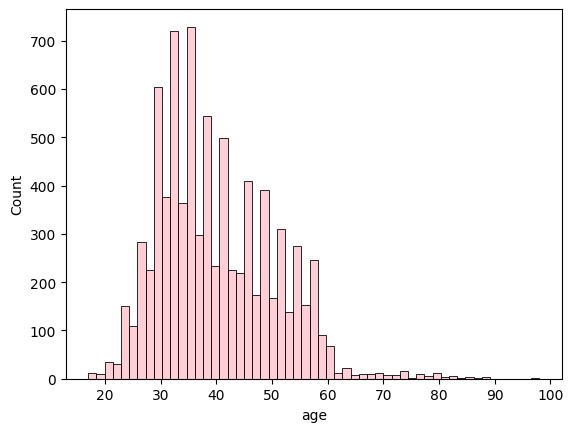

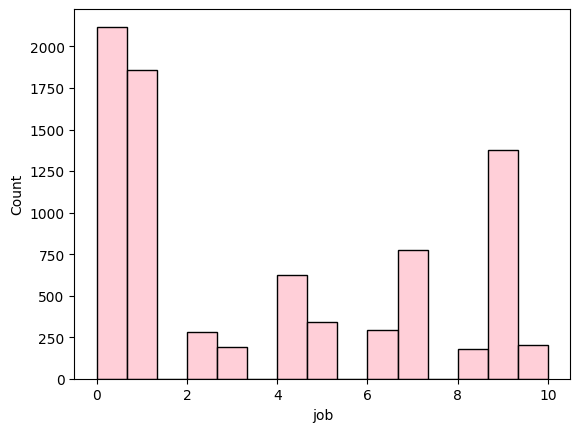

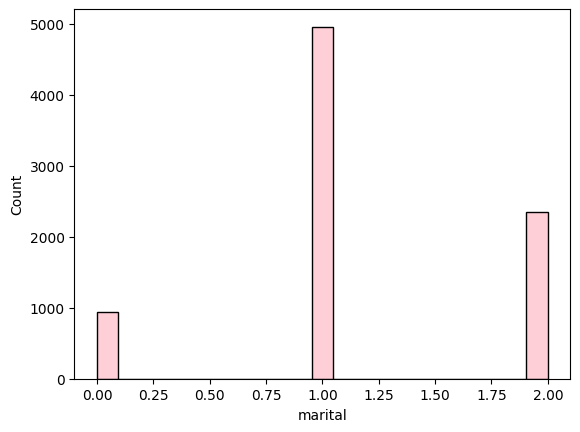

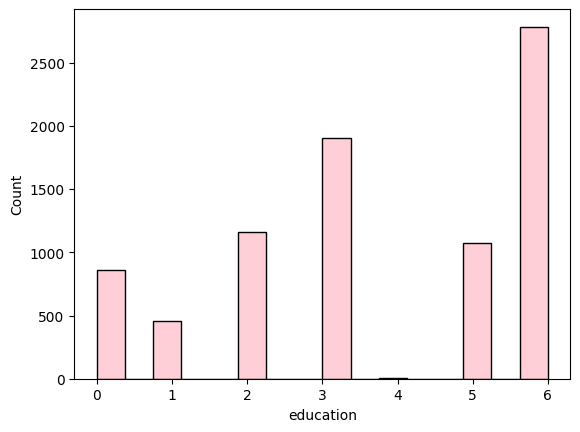

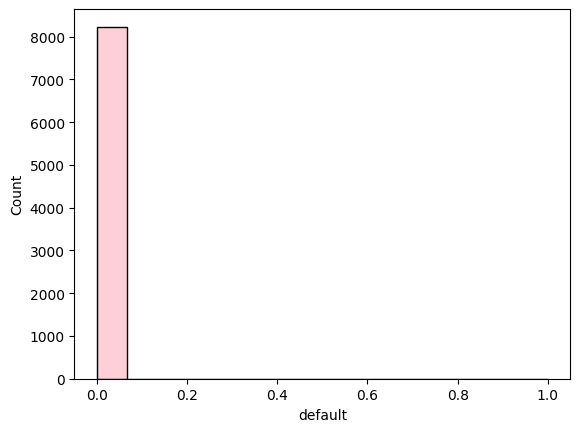

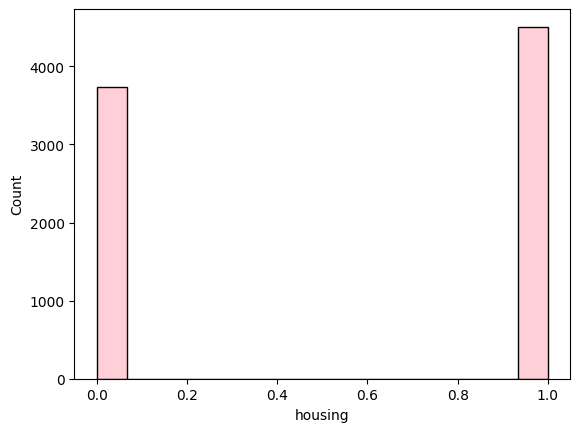

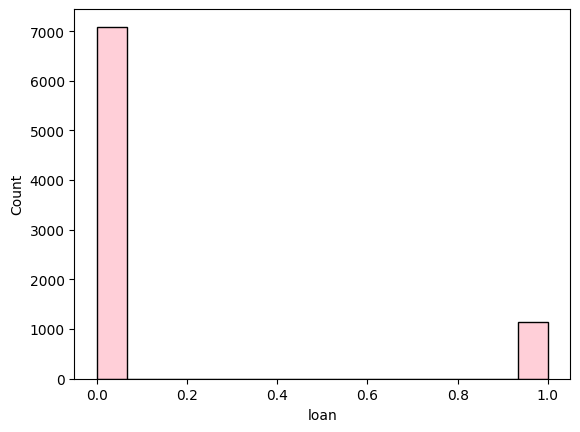

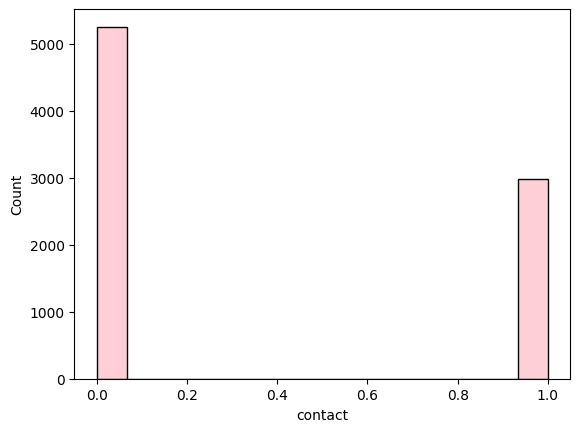

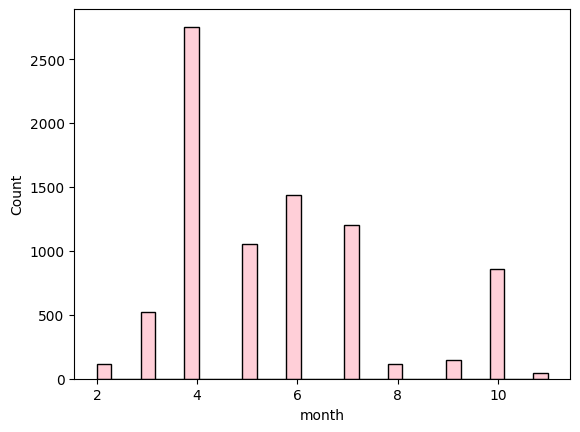

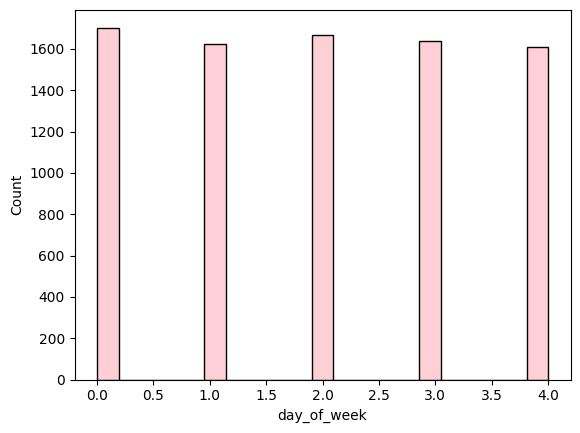

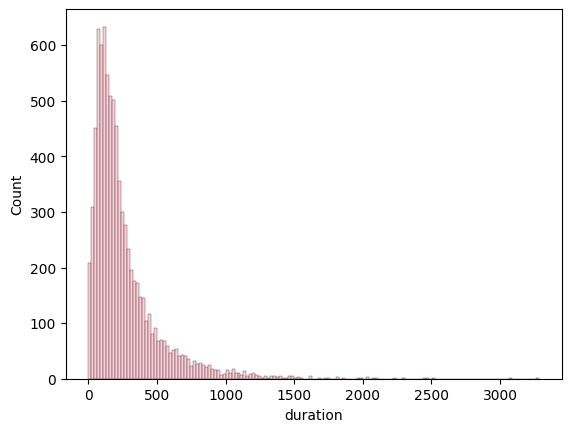

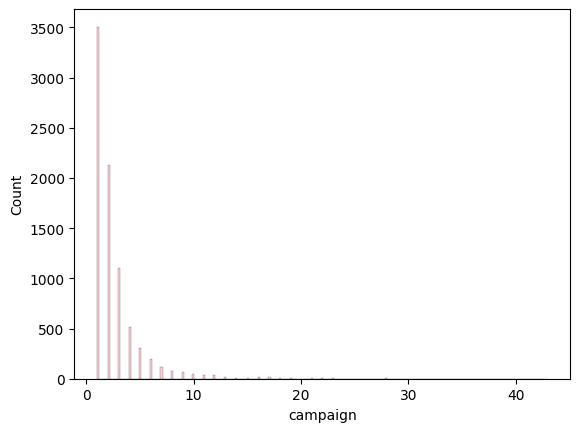

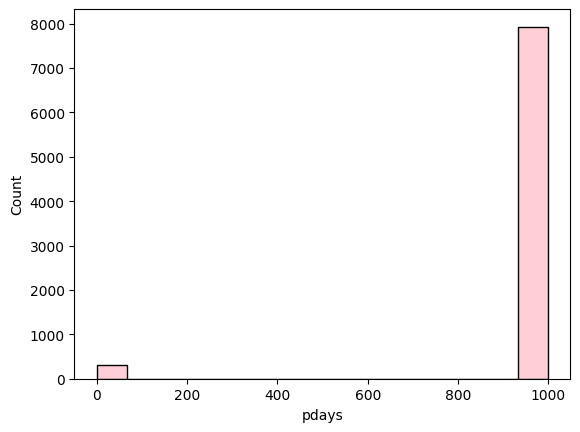

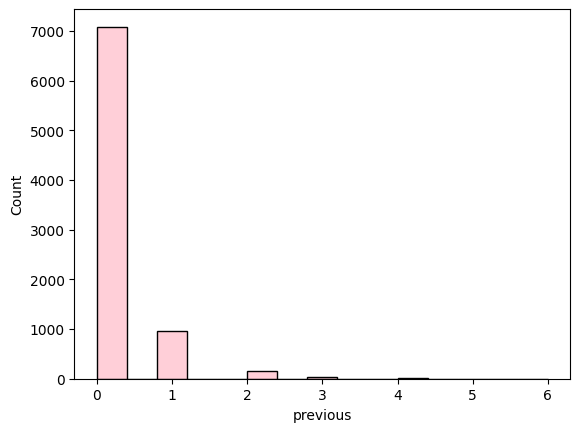

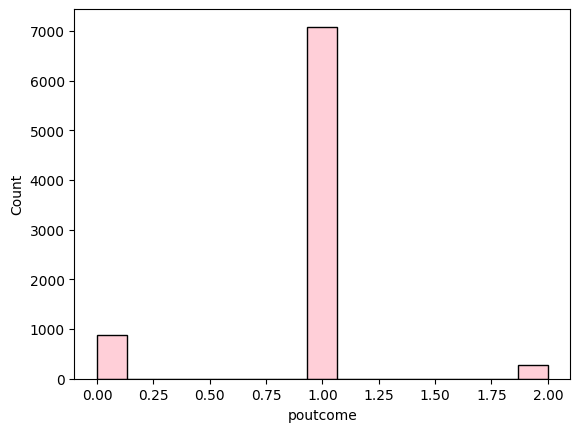

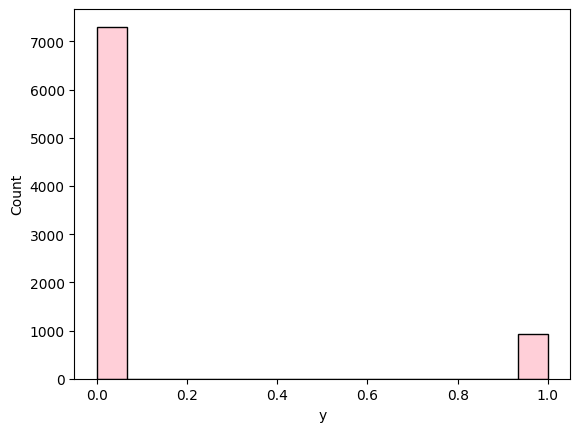

In [16]:
for i in preprocessed_df.GetDataFrame():
    preprocessed_df.HistPlot(i)

#### Boxplotting

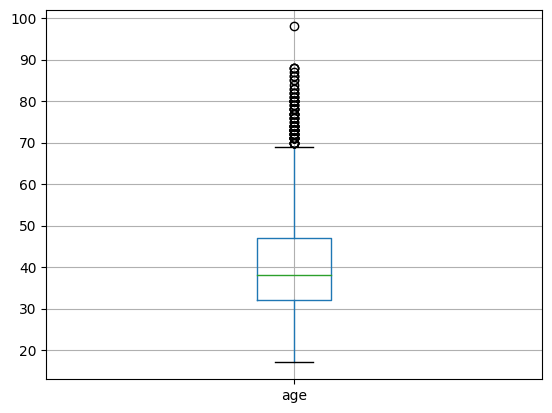

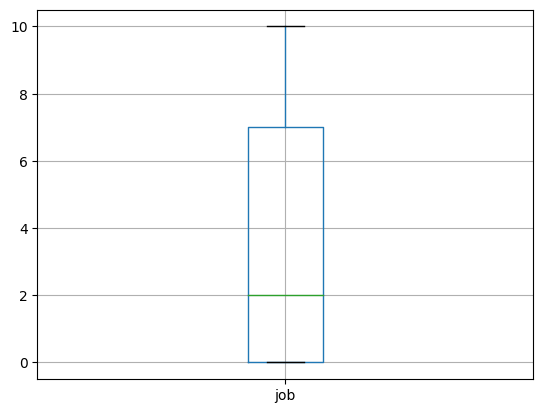

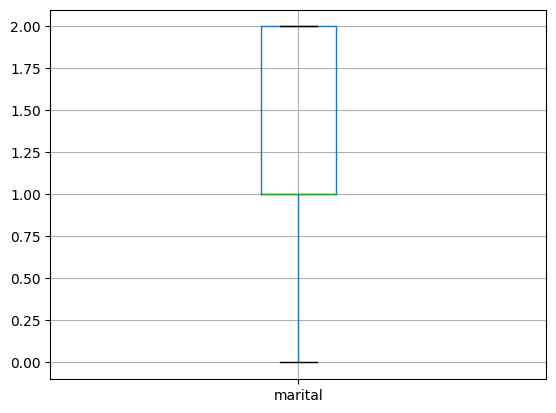

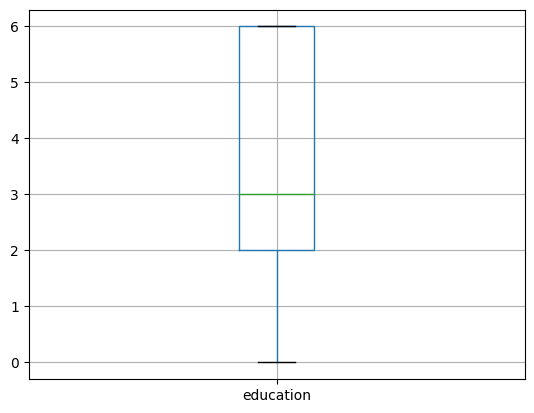

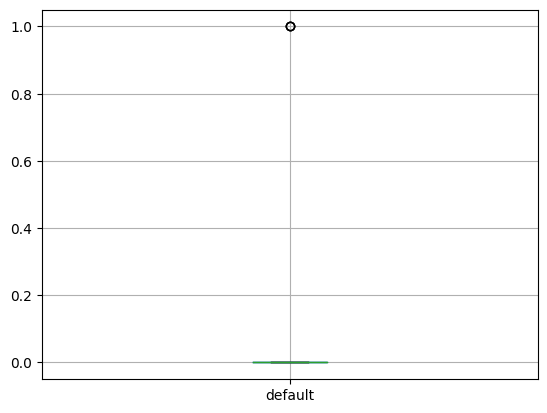

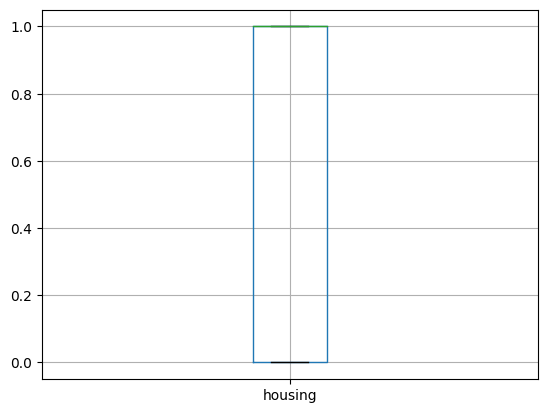

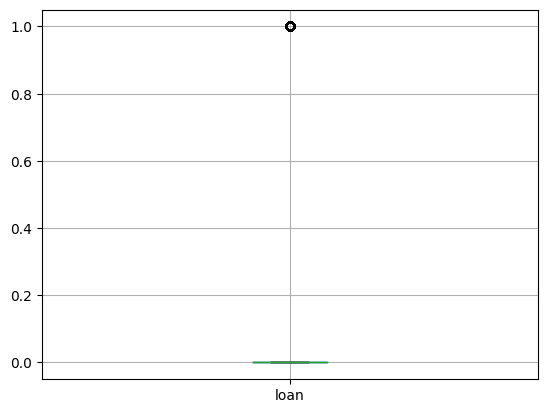

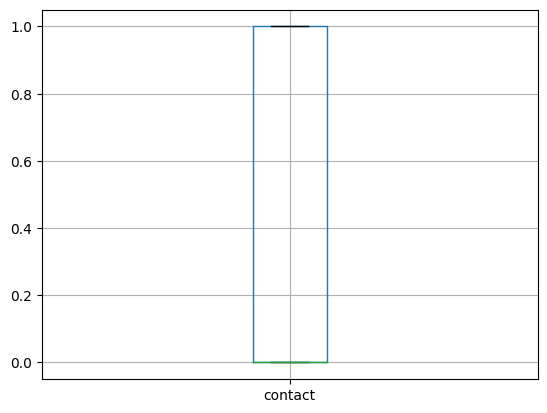

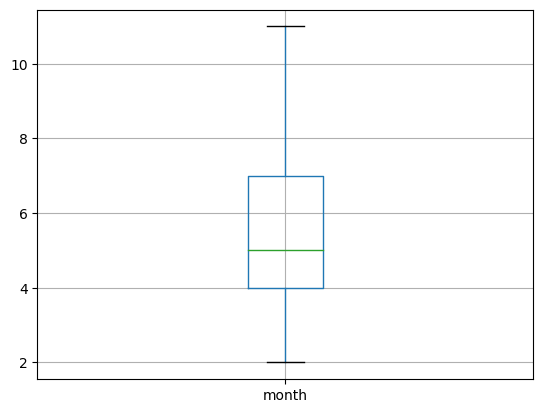

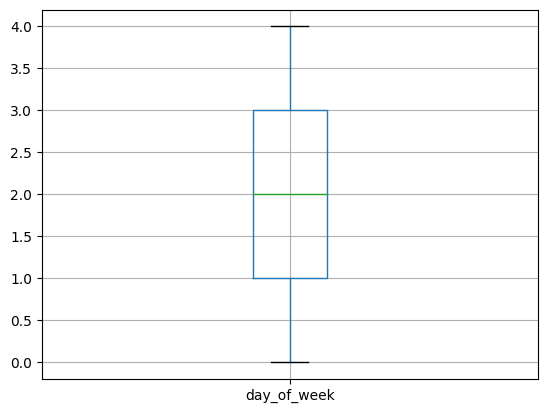

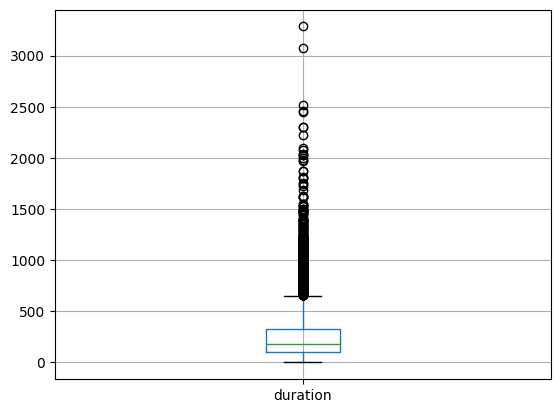

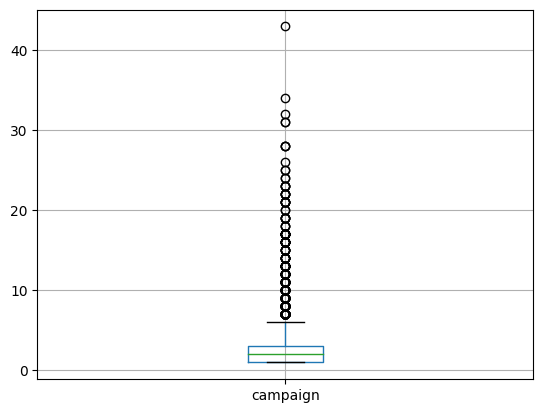

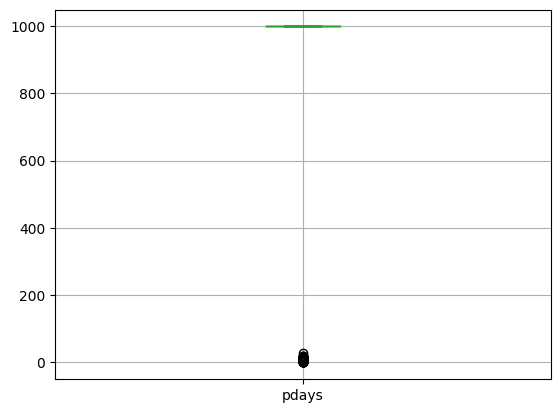

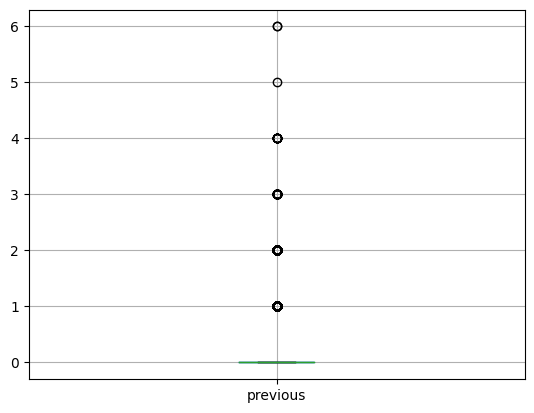

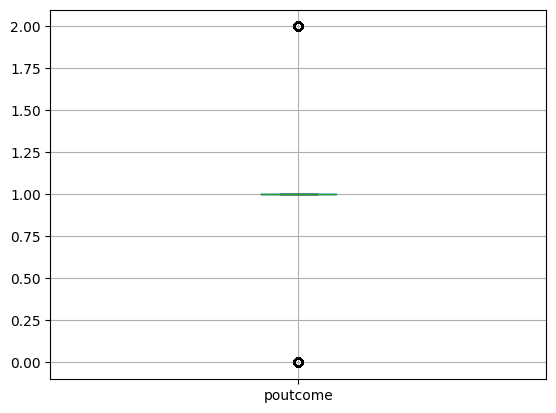

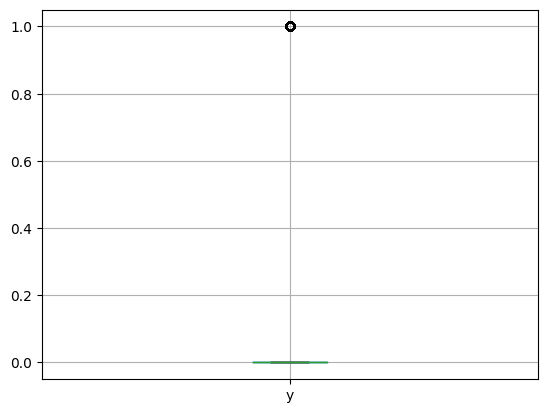

In [17]:
for i in preprocessed_df.GetDataFrame():
    preprocessed_df.Boxplot(i)

Since the y column has class imbalance, we're going to try using SMOTE Oversampling to balance the classes and since the data have many outliers, we're going to scale the data using robust scaler

## Test Modelling For Oversampling

SMOTE oversampling is used to give variability to the data based on the minority data, but we have a risk that the data might be not true to the original. I want to avoid random oversampling because random oversampling might make the model overfit and it only duplicates random sample from the minority class. I also want to avoid random undersampling because there will be information reduction because some of the majority classes will be deleted. In my opinion, 0.5 sampling strategy is the most optimal. The model used for the testing is Decision Tree.

### Imbalanced classes

In [18]:
from mymodel.Classifier import DecisionTreeClassification

imbalanced_test_model = DecisionTreeClassification()

In [19]:
imbalanced_test_model.SetDataFrame(dataset=preprocessed_df.GetDataFrame(), target_variable='y')

In [20]:
imbalanced_test_model.FeatureSplitting()

In [21]:
imbalanced_test_model.TrainTestSplit('robust_scaler', 0.2)

In [22]:
imbalanced_test_model.Classify()


Classification Report

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1461
           1       0.42      0.45      0.43       187

    accuracy                           0.87      1648
   macro avg       0.67      0.68      0.68      1648
weighted avg       0.87      0.87      0.87      1648

AUC - ROC Score for the model: 0.6845578627194764


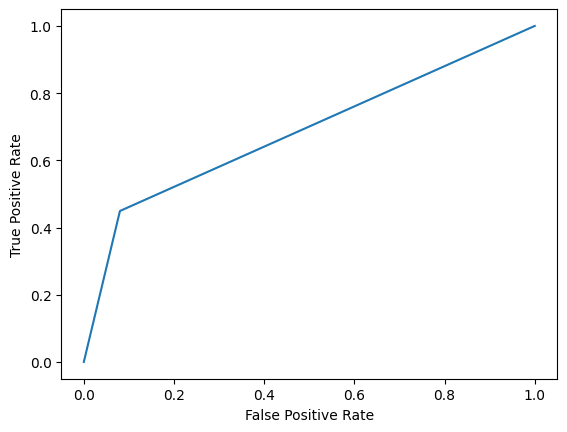

In [23]:
imbalanced_test_model.Evaluate(target_names=['0', '1'], show_curve=True)

### Balanced classes using SMOTE Oversampling

In [24]:
from mymodel.Classifier import DecisionTreeClassification

balanced_test_model = DecisionTreeClassification()

In [25]:
balanced_test_model.SetDataFrame(dataset=preprocessed_df.GetDataFrame(), target_variable='y')

In [26]:
balanced_test_model.FeatureSplitting()

In [27]:
balanced_test_model.HandleImbalanceClasses(0.5, 'smote')

In [28]:
balanced_test_model.TrainTestSplit(scale='robust_scaler', test_size=0.2)

In [29]:
balanced_test_model.Classify()


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1461
           1       0.79      0.81      0.80       730

    accuracy                           0.86      2191
   macro avg       0.84      0.85      0.85      2191
weighted avg       0.86      0.86      0.86      2191

AUC - ROC Score for the model: 0.8486676417916046


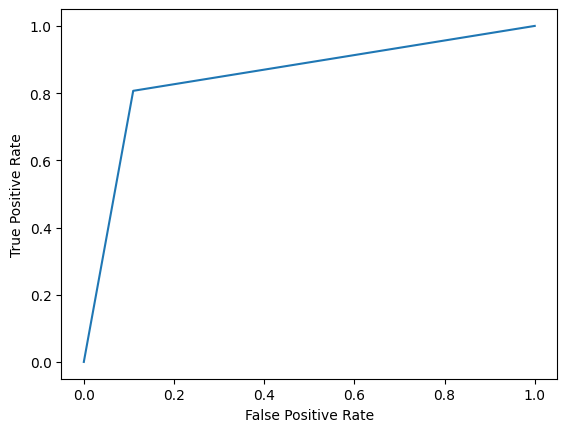

In [30]:
balanced_test_model.Evaluate(target_names=['0', '1'], show_curve=True)

Since the model performs better on using SMOTE Oversampling, we're going to use SMOTE Oversampling on the data.

## Class Balancing

In [31]:
preprocessed_df.FeatureSplitting()

In [32]:
preprocessed_df.HandleImbalanceClasses(0.5, 'smote')

In [33]:
preprocessed_df.TrainTestSplit('robust_scaler', test_size=0.2)

## Modelling

### Decision Tree

In [34]:
from mymodel.Classifier import DecisionTreeClassification

decision_tree = DecisionTreeClassification()

In [35]:
decision_tree.SetSplittedData(preprocessed_df.GetSplittedData())

In [36]:
decision_tree.SetEncodedValues(preprocessed_df.GetEncodedValues())

In [37]:
decision_tree.Classify()


Classification Report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1461
           1       0.79      0.81      0.80       730

    accuracy                           0.86      2191
   macro avg       0.84      0.85      0.85      2191
weighted avg       0.86      0.86      0.86      2191

AUC - ROC Score for the model: 0.8486676417916046


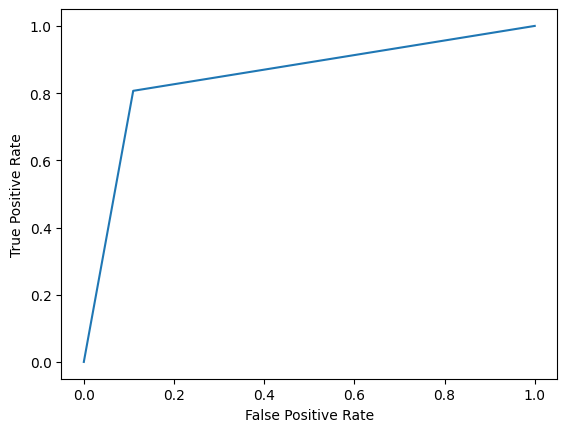

In [38]:
decision_tree.Evaluate(target_names=['0', '1'], show_curve=True)

### Support Vector Machine - Classifier

In [39]:
from mymodel.Classifier import SVClassification

svm = SVClassification()

In [40]:
svm.SetSplittedData(preprocessed_df.GetSplittedData())

In [41]:
svm.SetEncodedValues(preprocessed_df.GetEncodedValues())

In [42]:
svm.Classify()


Classification Report

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      1461
           1       0.83      0.19      0.31       730

    accuracy                           0.72      2191
   macro avg       0.77      0.58      0.56      2191
weighted avg       0.75      0.72      0.65      2191

AUC - ROC Score for the model: 0.5842531386833938


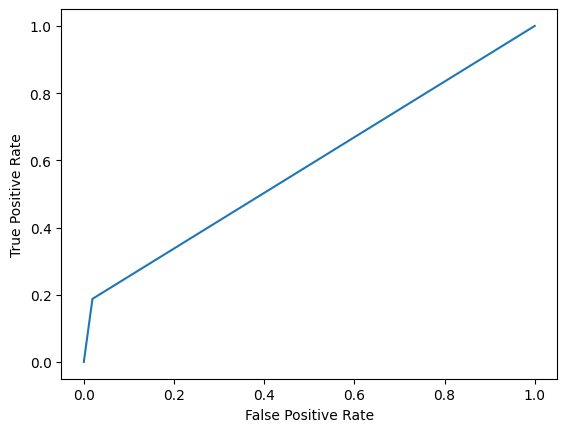

In [43]:
svm.Evaluate(target_names=['0', '1'], show_curve=True)

Based on both models' classification report and AUC-ROC curve, the Decision Tree is the best model.

## Model Dumping

In [44]:
import pickle as pkl

pkl.dump(decision_tree, open('decision_tree.pkl', 'wb'))

## Local Testing

### Testing for prediction shape

In [45]:
decision_tree.Predict(decision_tree.Transform([29,"technician","single","basic.9y","no", "yes","no","cellular","nov","wed",648.0,1,999,0,"nonexistent"]).reshape(1, -1))[0]

0

### Generate 3 random samples

In [46]:
import random

random.seed(123)

In [47]:
first_data = df.loc[[random.randint(0, len(df)-1)]]
first_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
857,33,self-employed,married,basic.4y,no,no,no,cellular,aug,wed,263.0,7,999,0,nonexistent,no


In [48]:
first_data.drop('y', axis=1).to_json('test_sample/first_data.json', orient='records', index=False)

In [49]:
second_data = df.loc[[random.randint(0, len(df)-1)]]
second_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
4385,36,entrepreneur,married,university.degree,no,no,no,telephone,may,wed,386.0,3,999,0,nonexistent,no


In [50]:
second_data.drop('y', axis=1).to_json('test_sample/second_data.json', orient='records', index=False)

In [51]:
yes_index = list(df[df['y'] == 'yes'].index)

In [52]:
third_data = df.loc[[yes_index[random.randint(0, len(yes_index) - 1)]]]
third_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
736,33,admin.,single,university.degree,no,yes,no,cellular,may,fri,396.0,5,999,0,nonexistent,yes


In [53]:
third_data.drop('y', axis=1).to_json('test_sample/third_data.json', orient='records', index=False)